<a href="https://colab.research.google.com/github/ksb7762-k/Dart-B/blob/main/Diagnosis_Of_Pneumonia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##  1. 서론
###  폐렴 탐지를 위한 흉부 X-ray 분류 프로젝트

- **목적**: 흉부 X-ray 이미지를 분석하여 폐렴(Pneumonia)과 정상(Normal)을 분류하는 정확하고 효율적인 머신러닝 모델 개발
- **데이터셋 구성**: 총 5,863장의 JPEG 이미지로 구성된 데이터셋 (train, test, val 폴더로 구분되며 각 폴더는 Pneumonia와 Normal 하위 폴더 포함)
- **사용 기술**: 딥러닝 기반 신경망 모델 및 이미지 분석 알고리즘
- **학습 방식**: train 데이터로 모델을 학습하고 test 및 val 데이터로 성능을 평가함
- **의료적 의의**: 조기 진단을 통해 환자 치료 효과 개선, 입원 기간 단축, 의료 자원 효율화에 기여 가능
- **학문적 기여**: 의료영상 및 자동 질병 진단 분야에 적용 가능한 컴퓨터 보조 진단 기술 개발


## 2. 라이브러리 블러오기

In [ ]:
!pip install -U tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 85.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 118.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 115.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 126.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 17.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 5.7 MB/s eta 0:00:00


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'darkgrid', color_codes = True)
from tensorflow.keras.applications import VGG16 # 사전 학습된 VGG16 모델을 불러오는 모듈. ImageNet 데이터셋으로 학습된 모델
from tensorflow.keras.models import Sequential  # 모델을 순차적으로 쌓는 단순한 모델 구조를 정의하기 위한 클래스.
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, Input
# - Conv2D: 2D 컨볼루션 레이어, 필터를 사용해 이미지의 특징을 추출
# - MaxPooling2D: 특징맵의 크기를 줄여주는 풀링 레이어
# - Dense: 완전 연결층, 모든 뉴런이 이전 층의 모든 뉴런과 연결됨
# - Flatten: 다차원 데이터를 1차원으로 펼치는 레이어
# - Dropout: 과적합을 방지하기 위해 일부 뉴런을 무작위로 비활성화
# - Input: 모델의 입력 형태를 지정하는 레이어

from keras.regularizers import L2  # 모델의 복잡도를 줄이기 위해 가중치에 L2 정규화를 적용하는 클래스
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
from sklearn.metrics import roc_curve, auc # 분류 모델의 성능을 평가하는 ROC 곡선과 AUC (Area Under the Curve) 계산 모듈
from tensorflow.keras.preprocessing.image import load_img # 이미지를 불러오는 유틸리티, 모델 입력 형식에 맞게 이미지를 불러올 때 사용
import warnings
warnings.filterwarnings('ignore')

## 3. Dataset 불러오기

In [ ]:
img_width, img_height = 256, 256
batchsize = 32
epochs = 4
num_of_class = 2

train = keras.utils.image_dataset_from_directory(
    directory = '/content/drive/MyDrive/kagglestudy/archive/chest_xray/train',
    labels = 'inferred',  # 디렉토리 이름을 기반으로 라벨 자동 추론
    label_mode = 'categorical', # 원-핫 인코딩 형식으로 라벨 처리 (예: [1, 0], [0, 1])
    batch_size = batchsize,
    image_size = (img_width, img_height))

validation = keras.utils.image_dataset_from_directory(
    directory = '/content/drive/MyDrive/kagglestudy/archive/chest_xray/val',
    labels = 'inferred',
    label_mode = 'categorical',
    batch_size = batchsize,
    image_size = (img_width, img_height))

test = keras. utils.image_dataset_from_directory(
    directory = '/content/drive/MyDrive/kagglestudy/archive/chest_xray/test',
    labels = 'inferred',
    label_mode = 'categorical',
    batch_size = batchsize,
    image_size = (img_width, img_height))


Found 5216 files belonging to 2 classes.
Found 16 files belonging to 2 classes.
Found 624 files belonging to 2 classes.


딥러닝 모델은 일반적으로 파라미터가 많고 데이터에 대한 의존도가 높기 때문에, Validation Set을 따로 두어 과적합을 방지하는 것이 중요.

## 4. 데이터 시각화

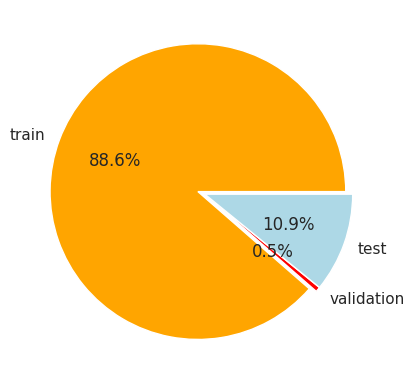

In [ ]:
plt.pie([len(train), len(validation), len(test)],
        labels =['train', 'validation', 'test'], autopct='%.1f%%', colors = ['orange', 'red', 'lightblue'], explode = (0.05, 0, 0))
plt.show()

In [ ]:
print(train.class_names)
print(validation.class_names)
print(test.class_names)

['NORMAL', 'PNEUMONIA']
['NORMAL', 'PNEUMONIA']
['NORMAL', 'PNEUMONIA']


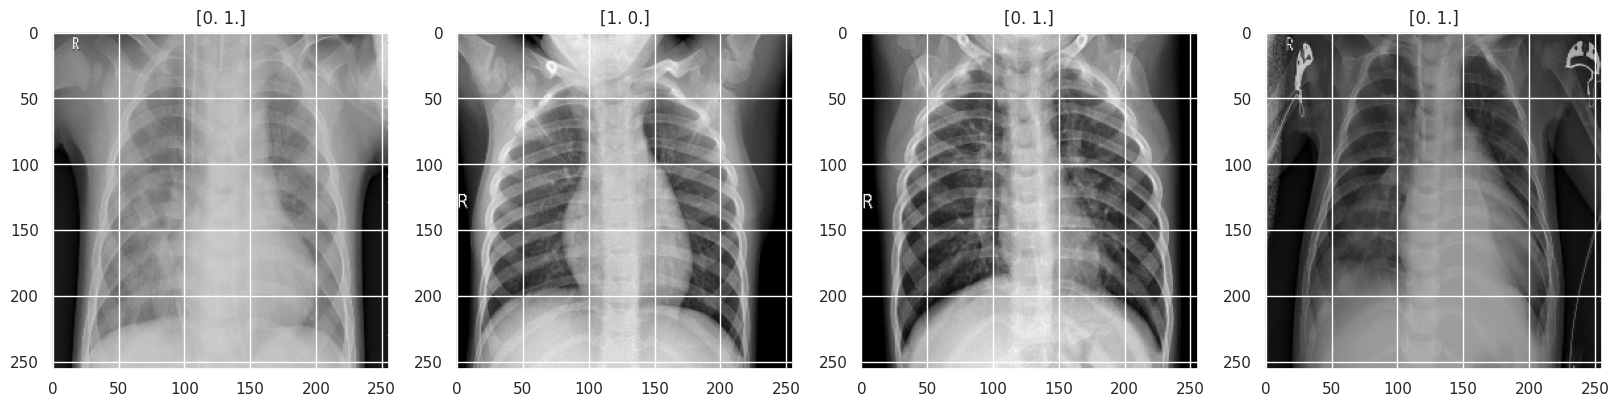

In [ ]:
data_iterator = train.as_numpy_iterator()  # TensorFlow 데이터셋을 NumPy 형식으로 순회할 수 있는 반복자 생성
batch = data_iterator.next()
fig, ax = plt.subplots(ncols = 4, figsize = (20, 20))
for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

## 5. 데이터 전처리

In [ ]:
x_train = []
y_train = []
x_val = []
y_val = []
x_test = []
y_test = []

for feature, label in train: # 학습 데이터셋의 각 배치에서 이미지와 라벨을 추출하여 리스트에 저장
    x_train.append(feature.numpy())  # Tensor 형식의 이미지 데이터를 Numpy 배열로 변환하여 추가
    y_train.append(label.numpy()) # Tensor 형식의 라벨 데이터를 Numpy 배열로 변환하여 추가

for feature, label in test:
    x_test.append(feature.numpy())
    y_test.append(label.numpy())

for feature, label in validation:
    x_val.append(feature.numpy())
    y_val.append(label.numpy())

# 리스트에 저장된 각각의 데이터들을 단일 Numpy 배열로 결합
x_train = np.concatenate(x_train, axis=0) # 각 배치의 이미지 데이터를 하나의 배열로 결합
x_val = np.concatenate(x_val, axis=0)
x_test = np.concatenate(x_test, axis=0)
y_train = np.concatenate(y_train, axis=0)
y_val = np.concatenate(y_val, axis=0)
y_test = np.concatenate(y_test, axis=0)

In [ ]:
print('Shape of x_train :', x_train.shape)
print('Shape of y_train:', y_train.shape)
print('Shape of x_val :', x_val.shape)
print('Shape of y_val :', y_val.shape)
print('Shape of x_test :', x_test.shape)
print('Shape of y_test:', y_test.shape)

Shape of x_train : (5216, 256, 256, 3)
Shape of y_train: (5216, 2)
Shape of x_val : (16, 256, 256, 3)
Shape of y_val : (16, 2)
Shape of x_test : (624, 256, 256, 3)
Shape of y_test: (624, 2)


### 왜 shape이 (배치, 256, 256, 3)처럼 4차원이 되는가? => 이미지 데이터는 4차원 배열이 맞음    

(이미지 수, 높이, 너비, 채널) 순서이기 때문  

y_train은 **레이블(정답 값)**

In [ ]:
x_train = x_train/256 # 학습 데이터의 모든 픽셀 값을 0~1 범위로 정규화 (256으로 나눔)
x_val = x_val/256
x_test = x_test/256

## 6. Training Step

# 🧠 **VGG16 모델이란?**

VGG16은 옥스포드 대학교의 Visual Geometry Group (VGG)에서 개발한 **합성곱 신경망 (Convolutional Neural Network, CNN)** 모델로, **ImageNet 대회 (ILSVRC 2014)**에서 매우 우수한 성능을 보여 널리 알려진 모델입니다. 기본적으로 이미지의 시각적 특징을 추출하여 분류하는 데 최적화된 모델로, **16개의 가중치 층**을 포함하고 있어 VGG**16**이라는 이름이 붙었습니다.

---

### **🔍 VGG16 모델의 특징**

1. **고정된 입력 크기**
   - 모든 입력 이미지는 **224x224 RGB** 형식이어야 함.
   - 입력 텐서의 형태는 `(224, 224, 3)` (가로, 세로, 채널).

2. **단순하고 깊은 구조**
   - 3x3 **Conv2D** 필터를 여러 개 겹쳐 깊은 네트워크를 구성.
   - **MaxPooling** 층을 사용해 점진적으로 이미지의 공간 크기 감소.
   - 마지막에 **Fully Connected (Dense) Layer**로 연결하여 최종 분류.

3. **작은 필터 사용**
   - 모든 합성곱층에서 **3x3** 크기의 필터 사용.
   - 더 깊은 네트워크 구조를 통해 더 복잡한 특징을 추출.

4. **많은 파라미터**
   - 약 **138M** (1억 3천 8백만) 개의 학습 가능한 파라미터.

---

### **📝 기본 VGG16 모델 구조**

```python
from tensorflow.keras.applications import VGG16

# VGG16 모델 생성
model = VGG16(weights='imagenet',  # ImageNet 데이터셋으로 학습된 가중치 사용
              include_top=True,    # 최상단 분류기 포함 (기본 설정)
              input_shape=(224, 224, 3))  # 입력 이미지 크기

# 모델 요약 출력
model.summary()


✅ include_top=True란?

최상단 분류기는 모델의 가장 마지막에 위치한 **완전 연결층 (Fully Connected Layer)**와 **출력층 (Softmax Layer)**를 의미

즉, 입력된 이미지의 특징을 추출한 후 최종적으로 클래스를 예측하는 부분

In [ ]:
def CNN_Model():      # VGG16 기반 모델 정의
  base_model = VGG16(weights = 'imagenet', include_top = False, input_shape = (img_width, img_height, 3))
  for layer in base_model.layers:
    layer.trainable = False

  for i in range(3):
    base_model.layers[-2-i].trainable = True  # 마지막 3개의 레이어는 미세 조정 (Fine-Tuning) 가능하게 설정

  CNN = Sequential()
  CNN.add(Input(shape=(img_width, img_height,3))) # add 메소드로 layer 쌓기
  CNN.add(base_model)
  CNN.add(Flatten())

  # 완전 연결층 (Dense Layer)
  CNN.add(Dropout(0.3))  # 과적합 방지를 위한 Dropout (30%의 뉴런 비활성화)
  CNN.add(Dense(128, activation = 'relu', kernel_regularizer = L2(0.05)))   # L2 정규화 적용, ReLU 활성화 함수
  CNN.add(Dropout(0.2))  # 또 다른 Dropout 층 (일반화 성능 향상)

  # 출력층 (클래스 개수에 맞춰 2개 뉴런, 시그모이드 활성화)
  CNN.add(Dense(2, activation ='sigmoid')) # 이진 분류를 위한 출력층 (클래스 2개)

  return CNN

model = CNN_Model()
model.compile(optimizer = 'adam', loss ='binary_crossentropy', metrics =['accuracy']) # 학습 속도가 빠른 Adam 옵티마이저 사용,  이진 분류용 손실 함수, 정확도를 주요 평가 지표로 설정

model.summary()
keras.utils.plot_model(model, show_shapes= True) # 모델 시각화 (레이어별 입출력 형태 표시)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 8, 8, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     4,194,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,909,378 (72.13 MB)

 Trainable params: 11,274,114 (43.01 MB)

 Non-trainable params: 7,635,264 (29.13 MB)

You must install pydot (`pip install pydot`) for `plot_model` to work.


Params : 신경망의 각 층에서 학습해야 할 모든 **가중치 (Weights)**와 **바이어스 (Bias)**의 합

In [ ]:
hist = model.fit(x_train, y_train, epochs = 6, validation_data= (x_val, y_val))
print(hist.history)
best_score = max(hist.history['val_accuracy'])
print(f'Best Validation score is : {best_score}')

Epoch 1/6
163/163 ━━━━━━━━━━━━━━━━━━━━ 1853s 11s/step - accuracy: 0.8745 - loss: 2.3085 - val_accuracy: 0.8125 - val_loss: 0.3305
Epoch 2/6
163/163 ━━━━━━━━━━━━━━━━━━━━ 1847s 11s/step - accuracy: 0.9636 - loss: 0.1520 - val_accuracy: 1.0000 - val_loss: 0.1447
Epoch 3/6
163/163 ━━━━━━━━━━━━━━━━━━━━ 1843s 11s/step - accuracy: 0.9645 - loss: 0.2139 - val_accuracy: 0.6875 - val_loss: 2.0535
Epoch 4/6
163/163 ━━━━━━━━━━━━━━━━━━━━ 1848s 11s/step - accuracy: 0.9746 - loss: 0.2276 - val_accuracy: 1.0000 - val_loss: 0.1318
Epoch 5/6
163/163 ━━━━━━━━━━━━━━━━━━━━ 1845s 11s/step - accuracy: 0.9846 - loss: 0.1073 - val_accuracy: 1.0000 - val_loss: 0.0285
Epoch 6/6
163/163 ━━━━━━━━━━━━━━━━━━━━ 1847s 11s/step - accuracy: 0.9874 - loss: 0.0583 - val_accuracy: 1.0000 - val_loss: 0.0402
{'accuracy': [0.9225460290908813, 0.9620398879051208, 0.95820552110672, 0.9743098020553589, 0.9848542809486389, 0.9861963391304016], 'loss': [0.8340985774993896, 0.15222279727458954, 0.2409839779138565, 0.213972315192222

## 7. 모델 평가

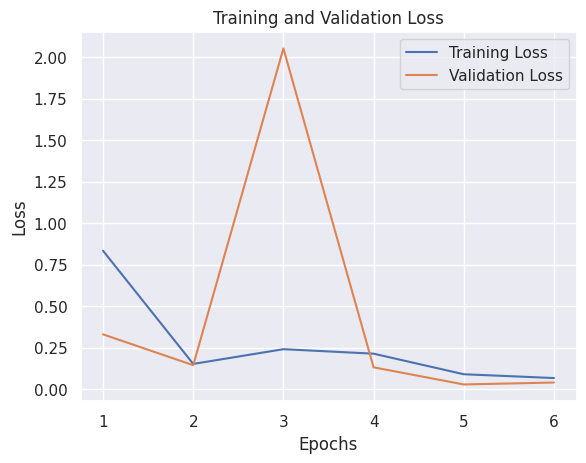

In [ ]:
train_loss = hist.history['loss']   # 모델 학습 중 각 epoch에서의 훈련 손실 (Training Loss) 값을 가져옴
val_loss = hist.history['val_loss'] # 모델 학습 중 각 epoch에서의 검증 손실 (Validation Loss) 값을 가져옴

epochs = range(1, len(train_loss) + 1)

plt.plot(epochs, train_loss, label = 'Training Loss')
plt.plot(epochs, val_loss, label = 'Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

- 3번째 epoch에서 Validation Loss가 급격히 증가

- 이 구간에서 과적합이 발생했거나, 데이터의 불균형 또는 배치(batch) 문제일 가능성

- 폭발적인 손실 증가는 주로 **학습률(Learning Rate)**이 너무 크거나, **배치 크기(Batch Size)**가 너무 작은 경우에 나타남

- 데이터 전처리가 잘못되었거나, 모델이 갑작스럽게 비정상적인 패턴을 학습했을 수도 있음

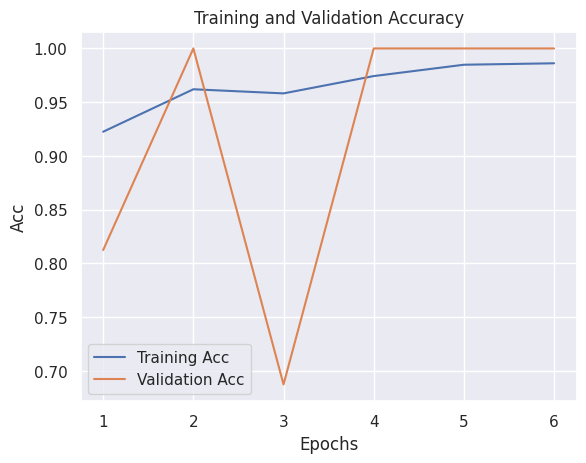

In [ ]:
train_accuracy = hist.history['accuracy']
val_accuracy = hist.history['val_accuracy']

epochs = range(1, len(train_accuracy) + 1)

plt.plot(epochs, train_accuracy, label = 'Training Acc')
plt.plot(epochs, val_accuracy, label = 'Validation Acc')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.grid(True)
plt.show()

## 8. 모델 저장

In [ ]:
model.save('CNN_model.h5') model.save('CNN_model.h5')  # 현재 학습된 모델을 'CNN_model.h5' 파일로 저장
print('Model saved successfully!')

Model saved successfully!
